In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [3]:
try:
    events = pd.read_csv('../dataset/events.csv')
    item_props = pd.read_csv('../dataset/item_properties.csv')
    print("Data Loaded Successfully!")
except FileNotFoundError:
    print("❌ File not found. Please check the path.")
    

✅ Data Loaded Successfully!


In [4]:
print("--- EVENTS TABLE OVERVIEW ---")
print(f"Shape: {events.shape}")
display(events.head())
print("\nData Types:")
print(events.dtypes)

--- EVENTS TABLE OVERVIEW ---
Shape: (2756101, 5)


,timestamp,visitorid,event,itemid,transactionid
0,1433221332117,257597,view,355908,NaN
1,1433224214164,992329,view,248676,NaN
2,1433221999827,111016,view,318965,NaN
3,1433221955914,483717,view,253185,NaN
4,1433221337106,951259,view,367447,NaN



Data Types:
timestamp          int64
visitorid          int64
event             object
itemid             int64
transactionid    float64
dtype: object


In [5]:
# Check missing values
print("\nMissing Values:")
print(events.isnull().sum())


Missing Values:
timestamp              0
visitorid              0
event                  0
itemid                 0
transactionid    2733644
dtype: int64


In [6]:
print("\n--- ITEM PROPERTIES OVERVIEW ---")
print(f"Shape: {item_props.shape}")
display(item_props.head())
print(f"Unique Items with properties: {item_props['itemid'].nunique()}")


--- ITEM PROPERTIES OVERVIEW ---
Shape: (20275902, 4)


,timestamp,itemid,property,value
0,1435460400000,460429,categoryid,1338
1,1441508400000,206783,888,1116713 960601 n277.200
2,1439089200000,395014,400,n552.000 639502 n720.000 424566
3,1431226800000,59481,790,n15360.000
4,1431831600000,156781,917,828513


Unique Items with properties: 417053


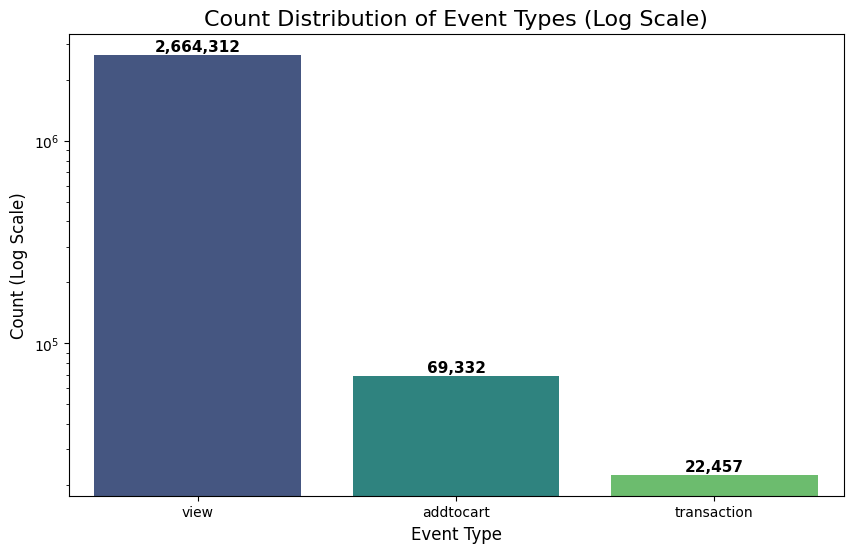


📊 Funnel Analysis (Conversion Rates):
1. View:        2,664,312 (Base)
2. Add to Cart: 69,332  (CTR: 2.60%)
3. Transaction: 22,457   (CR from Cart: 32.39%)
Overall CR (View -> Buy): 0.84%


In [10]:
# Xem tỷ lệ View vs AddToCart vs Transaction
event_counts = events['event'].value_counts()

plt.figure(figsize=(10, 6))
# Using barplot with hue to avoid palette warning, same as your old code
ax = sns.barplot(x=event_counts.index, y=event_counts.values,
                 hue=event_counts.index, legend=False,
                 palette="viridis")

plt.title('Count Distribution of Event Types (Log Scale)', fontsize=16)
plt.xlabel('Event Type', fontsize=12)
plt.ylabel('Count (Log Scale)', fontsize=12)

# 👉 APPLY LOG SCALE (Crucial for visibility)
plt.yscale('log')

# Add Labels
for i, count in enumerate(event_counts.values):
    plt.text(i, count, f'{count:,}', ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.show()

# --- Funnel Analysis (Text Report) ---
print("\n📊 Funnel Analysis (Conversion Rates):")
n_view = event_counts.get('view', 0)
n_cart = event_counts.get('addtocart', 0)
n_trans = event_counts.get('transaction', 0)

print(f"1. View:        {n_view:,} (Base)")
print(f"2. Add to Cart: {n_cart:,}  (CTR: {n_cart/n_view:.2%})")
print(f"3. Transaction: {n_trans:,}   (CR from Cart: {n_trans/n_cart:.2%})")
print(f"Overall CR (View -> Buy): {n_trans/n_view:.2%}")